In [1]:
import numpy as np
import pandas as pd

**Reading Dataset**

In [8]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kHYlbPezuWZWjErTPFNYSUjrR5C6ifu13Gnb21Jq8zly',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'placementtrendprediction-donotdelete-pr-fzwbc0sg0fxliy'
object_key = 'PlacementData.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [9]:
#sl_no column is not necessary, we drop it
df = df.drop(columns = ['sl_no'])
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [10]:
df['salary'].isnull().sum()

67

In [11]:
#Salary column contains many null values, so we drop it
df = df.drop(columns = ['salary'])
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [12]:
#Size of dataset
df.shape

(215, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [14]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [15]:
#Checking for Null values in dataset
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [16]:
#Checking for duplicated values
df.duplicated().value_counts()

False    215
dtype: int64

In [17]:
#Target Attribute categories
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [18]:
#Visualizing the Target attribute
import matplotlib.pyplot as plt
import seaborn as sns

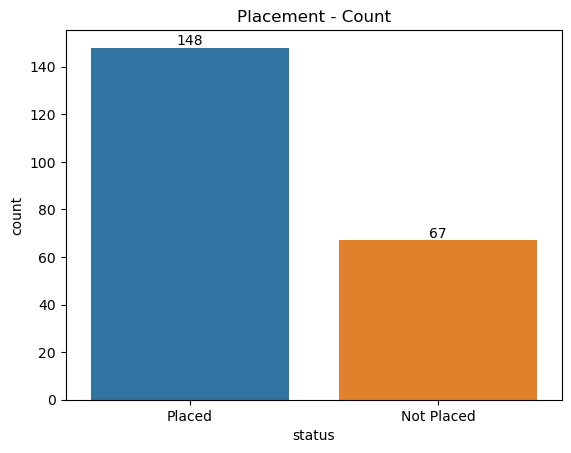

In [19]:
#Visualizing count
count = sns.countplot(x = df.status)
for i in count.containers:
  count.bar_label(i)
plt.title("Placement - Count")
plt.show()

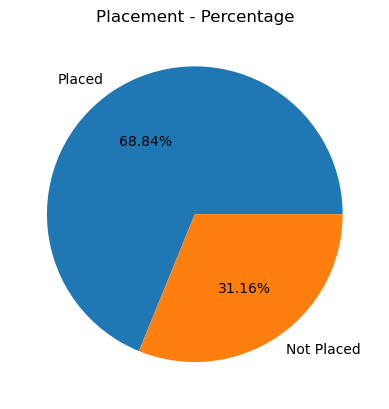

In [20]:
#Visualizing percentage
values = df.status.value_counts()
plt.pie(values,labels=['Placed','Not Placed'],autopct="%1.2f%%")
plt.title("Placement - Percentage")
plt.show()

*We can see that 68.84% are 'Placed' and 31.16% are 'Not Placed'*

In [21]:
#Relation of each Numerical attribute with Target attribute
df.groupby(['status']).mean().round(3)

,ssc_p,hsc_p,degree_p,etest_p,mba_p
status,,,,,
Not Placed,57.544,58.396,61.134,69.588,61.613
Placed,71.721,69.927,68.741,73.238,62.579


*The result depicts that the average values are high for 'Placed' attribute*

**Visualizing Numerical Attributes**

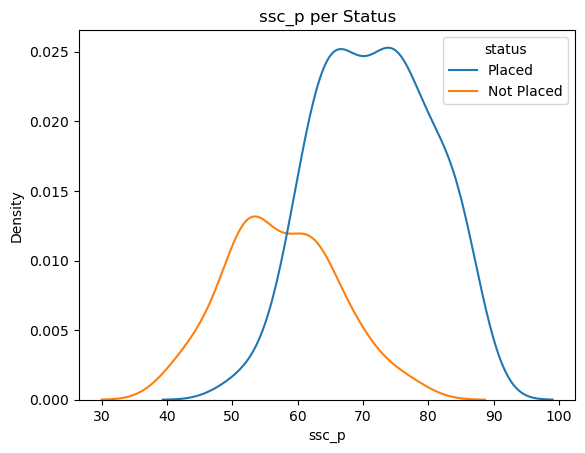

In [22]:
#Visualizing the pattern of SSC percentage(ssc_p) attribute with Target attribute
sns.kdeplot(data=df, x='ssc_p', hue="status")
plt.title('ssc_p per Status')
plt.show()

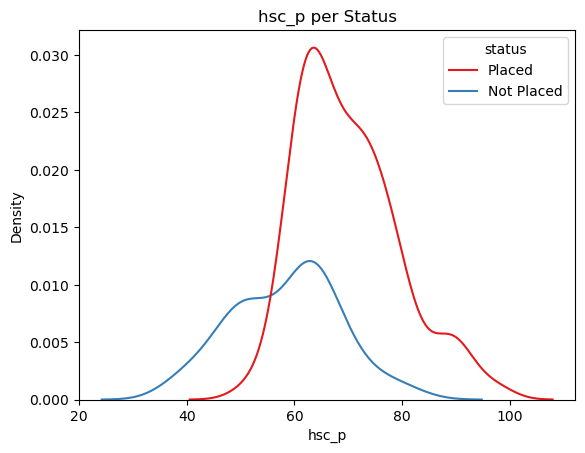

In [23]:
#Visualizing the pattern of HighSchool percentage(hsc_p) attribute with Target attribute
sns.kdeplot(data=df, x='hsc_p', hue="status", palette="Set1")
plt.title('hsc_p per Status')
plt.show()

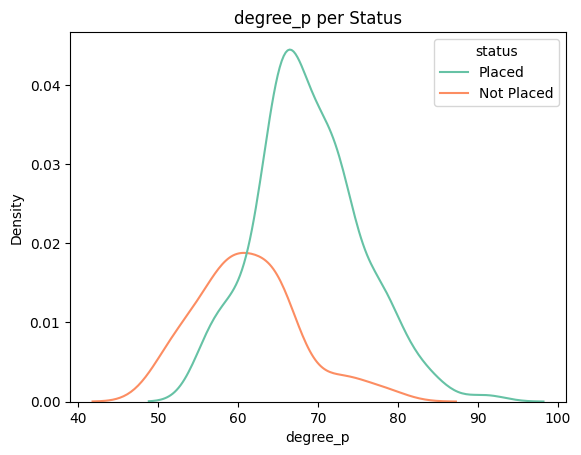

In [18]:
#Visualizing the pattern of Degree percentage(degree_p) attribute with Target attribute
sns.kdeplot(data=df, x='degree_p', hue="status", palette="Set2")
plt.title('degree_p per Status')
plt.show()

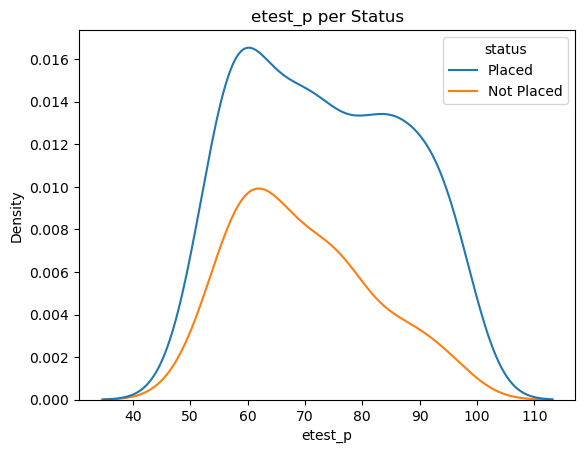

In [24]:
#Visualizing the pattern of EntranceTest percentage(etest_p) attribute with Target attribute
sns.kdeplot(data=df, x='etest_p', hue="status")
plt.title('etest_p per Status')
plt.show()

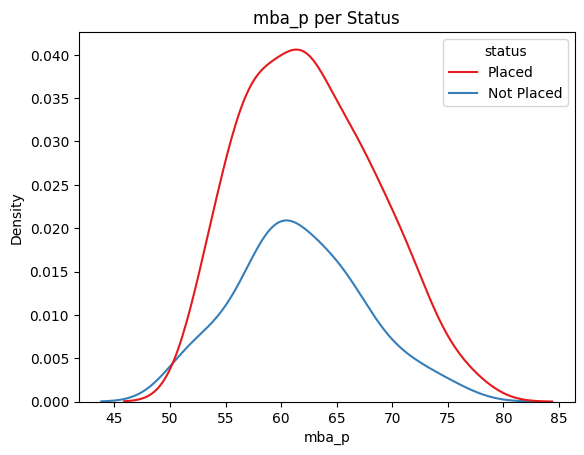

In [20]:
#Visualizing the pattern of MBA percentage(mba_p) attribute with Target attribute
sns.kdeplot(data=df, x='mba_p', hue="status", palette="Set1")
plt.title('mba_p per Status')
plt.show()

*We can observe that in every Attribute, 'Placed' has higher density compared to 'Not placed'*

**Visualising Non-Numeric Attributes**

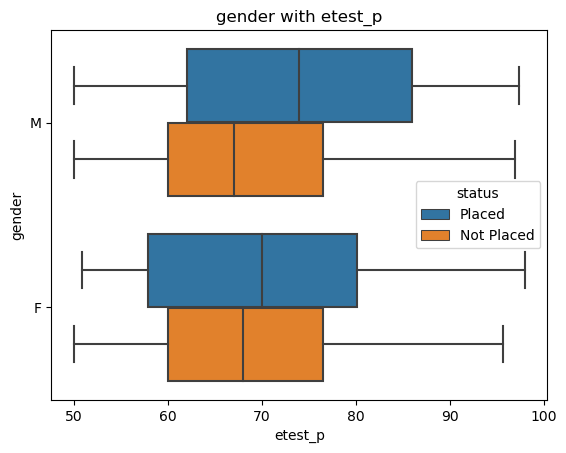

In [25]:
#Visualizing the pattern of Gender and etest_p attribute with Target attribute
sns.boxplot(data=df, x="etest_p", y="gender", hue="status")
plt.title("gender with etest_p")
plt.show()

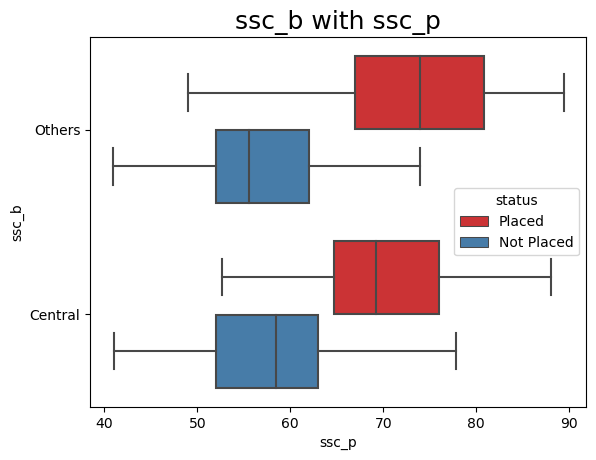

In [26]:
#Visualizing the pattern of ssc_b and ssc_p attribute with Target attribute
sns.boxplot(data=df, x="ssc_p", y="ssc_b", hue="status", palette="Set1")
plt.title("ssc_b with ssc_p" , fontsize = 18)
plt.show()

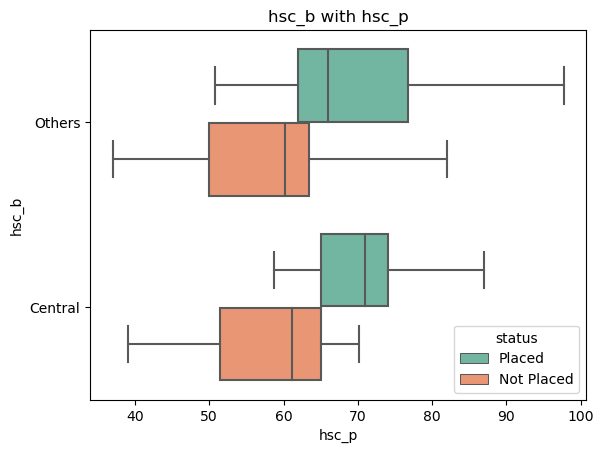

In [27]:
#Visualizing the pattern of hsc_p and hsc_b attribute with Target attribute
sns.boxplot(data=df, x="hsc_p", y="hsc_b", hue="status", palette="Set2")
plt.title("hsc_b with hsc_p")
plt.show()

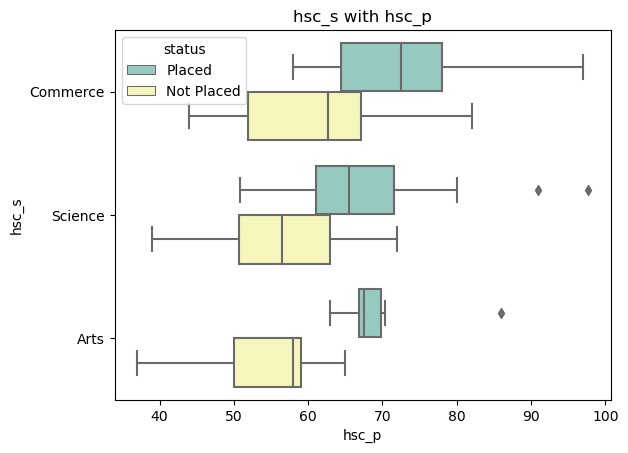

In [28]:
#Visualizing the pattern of hsc_p and hsc_s attribute with Target attribute
sns.boxplot(data=df, x="hsc_p", y="hsc_s", hue="status", palette="Set3")
plt.title("hsc_s with hsc_p")
plt.show()

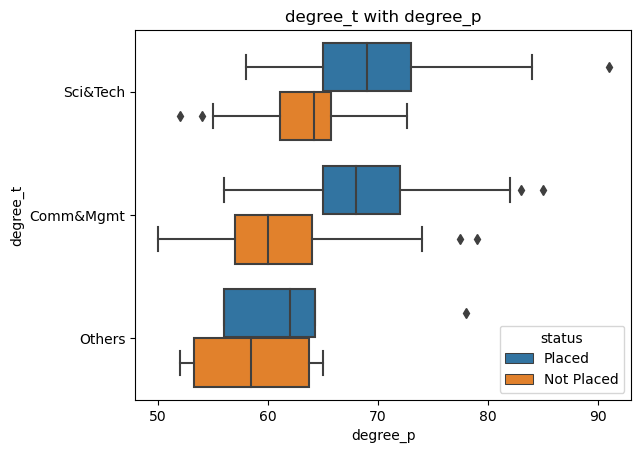

In [29]:
#Visualizing the pattern of degree_p and degree_t attribute with Target attribute
sns.boxplot(data=df, x="degree_p", y="degree_t", hue="status")
plt.title("degree_t with degree_p")
plt.show()

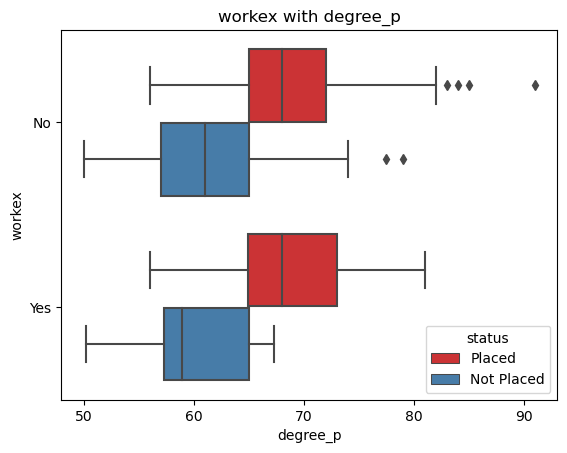

In [30]:
#Visualizing the pattern of degree_p and workex attribute with Target attribute
sns.boxplot(data=df, x="degree_p", y="workex", hue="status", palette="Set1")
plt.title("workex with degree_p")
plt.show()

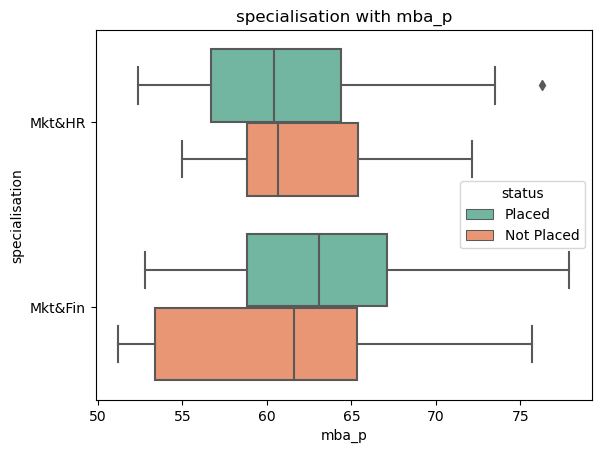

In [31]:
#Visualizing the pattern of mba_p and specialisation attribute with Target attribute
sns.boxplot(data=df, x="mba_p", y="specialisation", hue="status", palette="Set2")
plt.title("specialisation with mba_p")
plt.show()

**Bi-Variate Distribution**

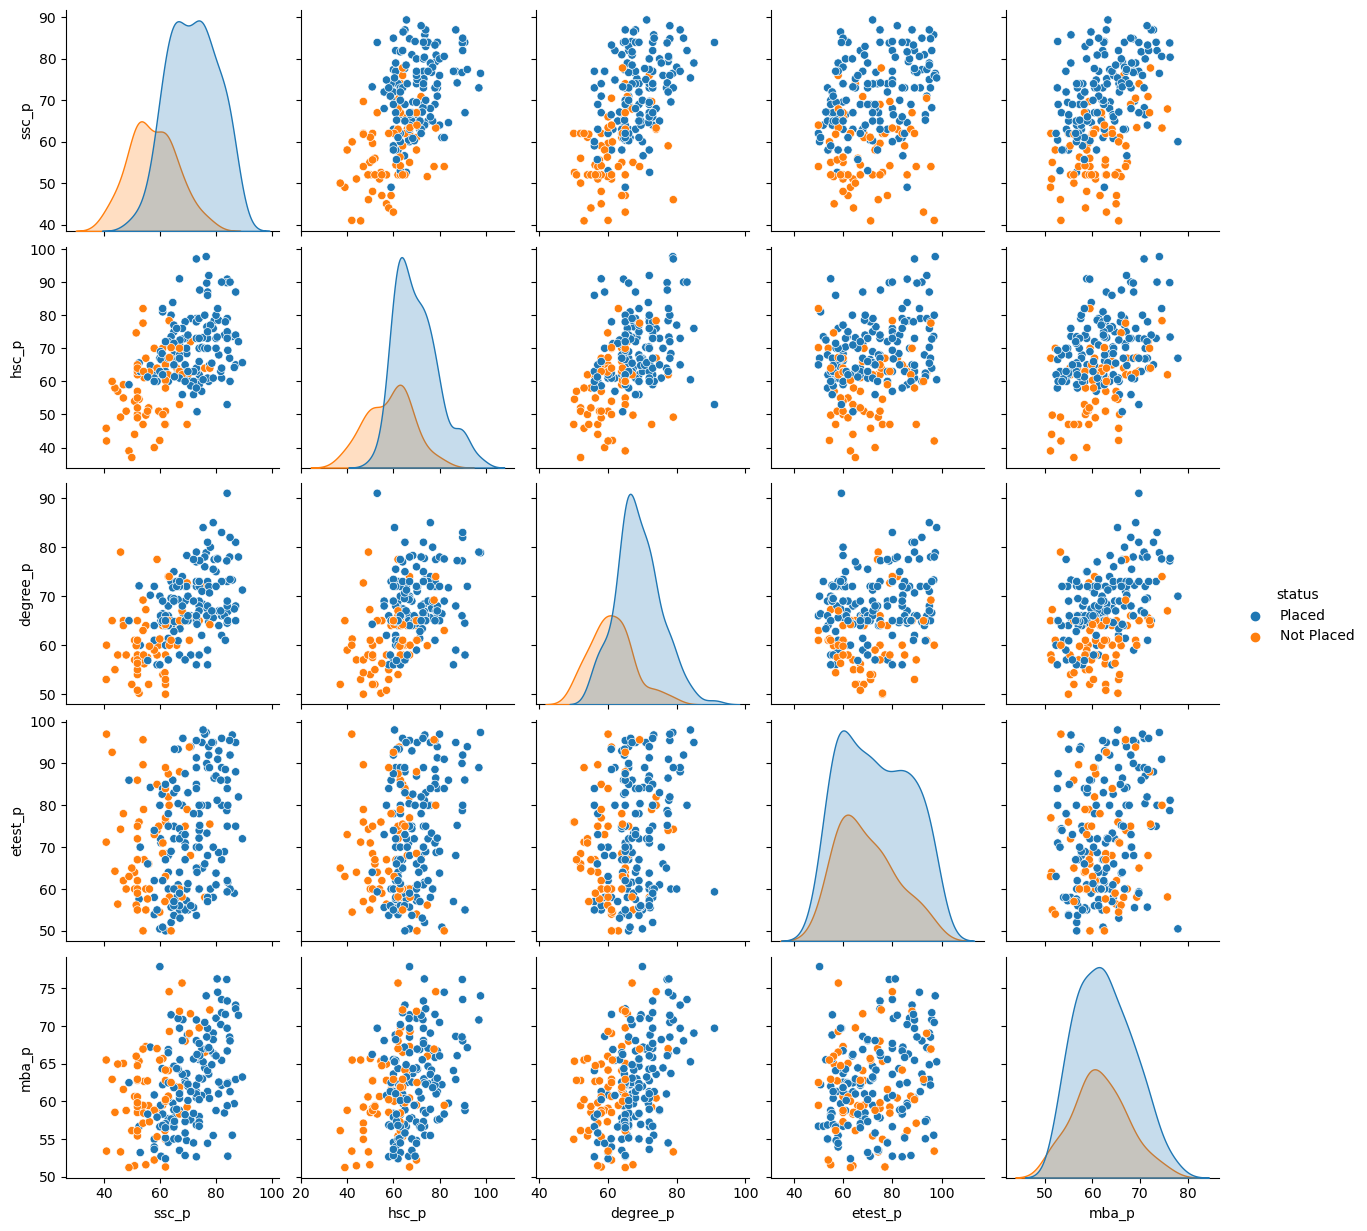

In [32]:
sns.pairplot(df,hue='status')
plt.show()

**Correlation heat map**

<AxesSubplot:>

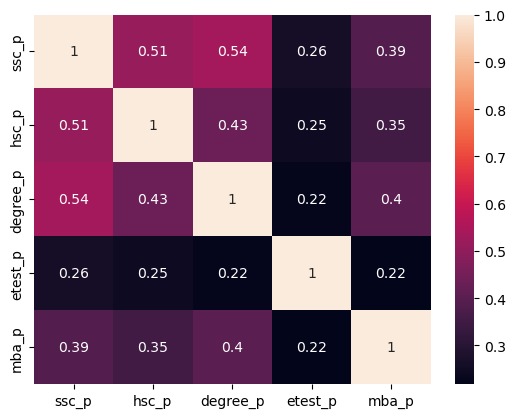

In [33]:
sns.heatmap(df.corr(),annot=True)

**Splitting the Dataset**

In [34]:
X = df.drop(columns=['status'])
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50


In [35]:
Y = pd.DataFrame(df.status)
Y.head()

,status
0,Placed
1,Placed
2,Placed
3,Not Placed
4,Placed


**Label Encoding**

In [36]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [37]:
#Encoding Gender Attribute
X.gender = Le.fit_transform(X.gender)
X.head(10)
#Male-1 Female-0

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50
5,1,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58
6,0,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29
7,1,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14
8,1,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29
9,1,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21


In [38]:
#Encoding ssc_b Attribute
X.ssc_b = Le.fit_transform(X.ssc_b)
X.head(10)
#Central-0 Others-1

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80
1,1,79.33,0,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28
2,1,65.00,0,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80
3,1,56.00,0,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43
4,1,85.80,0,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50
5,1,55.00,1,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58
6,0,46.00,1,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29
7,1,82.00,0,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14
8,1,73.00,0,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29
9,1,58.00,0,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21


In [39]:
#Encoding hsc_b Attribute
X.hsc_b = Le.fit_transform(X.hsc_b)
X.head(10)
#Central-0 Others-1

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80
1,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28
2,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80
3,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43
4,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50
5,1,55.00,1,49.80,1,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58
6,0,46.00,1,49.20,1,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29
7,1,82.00,0,64.00,0,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14
8,1,73.00,0,79.00,0,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29
9,1,58.00,0,70.00,0,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21


In [40]:
#Encoding hsc_s Attribute
X.hsc_s = Le.fit_transform(X.hsc_s)
X.head(10)
#Arts-0 Commerce-1 Science-2

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80
1,1,79.33,0,78.33,1,2,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28
2,1,65.00,0,68.00,0,0,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80
3,1,56.00,0,52.00,0,2,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43
4,1,85.80,0,73.60,0,1,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50
5,1,55.00,1,49.80,1,2,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58
6,0,46.00,1,49.20,1,1,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29
7,1,82.00,0,64.00,0,2,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14
8,1,73.00,0,79.00,0,1,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29
9,1,58.00,0,70.00,0,1,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21


In [41]:
#Encoding degree_t Attribute
X.degree_t = Le.fit_transform(X.degree_t)
X.head(10)
#Sci&Tech-2 Comm&Mgmt-0 Others-1

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,No,55.00,Mkt&HR,58.80
1,1,79.33,0,78.33,1,2,77.48,2,Yes,86.50,Mkt&Fin,66.28
2,1,65.00,0,68.00,0,0,64.00,0,No,75.00,Mkt&Fin,57.80
3,1,56.00,0,52.00,0,2,52.00,2,No,66.00,Mkt&HR,59.43
4,1,85.80,0,73.60,0,1,73.30,0,No,96.80,Mkt&Fin,55.50
5,1,55.00,1,49.80,1,2,67.25,2,Yes,55.00,Mkt&Fin,51.58
6,0,46.00,1,49.20,1,1,79.00,0,No,74.28,Mkt&Fin,53.29
7,1,82.00,0,64.00,0,2,66.00,2,Yes,67.00,Mkt&Fin,62.14
8,1,73.00,0,79.00,0,1,72.00,0,No,91.34,Mkt&Fin,61.29
9,1,58.00,0,70.00,0,1,61.00,0,No,54.00,Mkt&Fin,52.21


In [42]:
#Encoding workex Attribute
X.workex = Le.fit_transform(X.workex)
X.head(10)
#No-0 Yes-1

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.00,Mkt&HR,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.50,Mkt&Fin,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.00,Mkt&Fin,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.00,Mkt&HR,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.80,Mkt&Fin,55.50
5,1,55.00,1,49.80,1,2,67.25,2,1,55.00,Mkt&Fin,51.58
6,0,46.00,1,49.20,1,1,79.00,0,0,74.28,Mkt&Fin,53.29
7,1,82.00,0,64.00,0,2,66.00,2,1,67.00,Mkt&Fin,62.14
8,1,73.00,0,79.00,0,1,72.00,0,0,91.34,Mkt&Fin,61.29
9,1,58.00,0,70.00,0,1,61.00,0,0,54.00,Mkt&Fin,52.21


In [43]:
#Encoding specialisation Attribute
X.specialisation = Le.fit_transform(X.specialisation)
X.head(10)
#Mkt&HR-1 Mkt&Fin-0

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.00,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.80,0,55.50
5,1,55.00,1,49.80,1,2,67.25,2,1,55.00,0,51.58
6,0,46.00,1,49.20,1,1,79.00,0,0,74.28,0,53.29
7,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14
8,1,73.00,0,79.00,0,1,72.00,0,0,91.34,0,61.29
9,1,58.00,0,70.00,0,1,61.00,0,0,54.00,0,52.21


In [44]:
#Encoding Target Attribute
Y.status = Le.fit_transform(Y.status)
Y.head()
# #Placed-1 Not Placed-0

,status
0,1
1,1
2,1
3,0
4,1


**Normalization of attributes**

In [45]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [46]:
X_scaled = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,0.538240,1.0,0.889621,1.0,0.5,0.195122,1.0,0.0,0.104167,1.0,0.284483
1,1.0,0.792414,0.0,0.680890,1.0,1.0,0.670244,1.0,1.0,0.760417,0.0,0.564843
2,1.0,0.497011,0.0,0.510708,0.0,0.0,0.341463,0.0,0.0,0.520833,0.0,0.247001
3,1.0,0.311482,0.0,0.247117,0.0,1.0,0.048780,1.0,0.0,0.333333,1.0,0.308096
4,1.0,0.925788,0.0,0.602965,0.0,0.5,0.568293,0.0,0.0,0.975000,0.0,0.160795


**Splitting for Training and Testing Dataset**

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.3,random_state=5)

In [48]:
x_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
174,1.0,0.666873,1.0,0.227842,1.0,1.0,0.348049,1.0,1.0,0.291667,0.0,0.562969
200,1.0,0.579468,1.0,0.378913,1.0,0.5,0.365854,0.0,0.0,0.782292,0.0,0.059970
43,1.0,0.950526,1.0,0.823723,1.0,0.5,0.439024,0.0,0.0,0.937500,1.0,0.438156
62,0.0,0.940219,1.0,0.448105,1.0,1.0,0.424390,1.0,0.0,0.187500,0.0,0.317841
117,1.0,0.744383,1.0,0.626030,1.0,1.0,0.560976,1.0,0.0,0.625000,0.0,0.593703


In [49]:
#Size of training dataset
x_train.shape

(150, 12)

In [50]:
#Size of testing dataset
x_test.shape

(65, 12)

**Model Training for Classification**

*Decision Tree Classifier*

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
dt = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

#Finding Best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [53]:
dt = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=4, min_samples_split=2, class_weight='balanced')
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=4,
                       random_state=0)

In [54]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 75.38 %


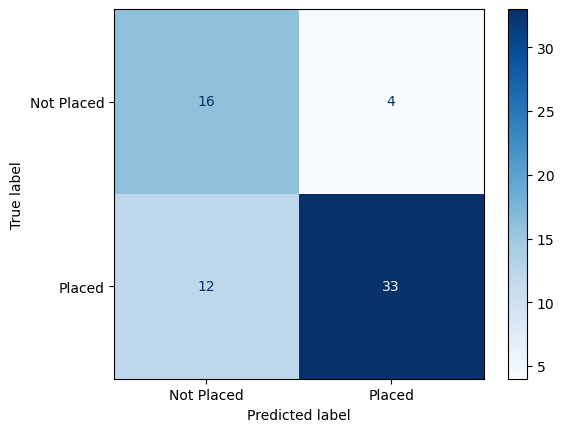

In [55]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred, cmap = plt.cm.Blues, normalize = None, display_labels = ['Not Placed', 'Placed'])

In [56]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        20
           1       0.89      0.73      0.80        45

    accuracy                           0.75        65
   macro avg       0.73      0.77      0.74        65
weighted avg       0.79      0.75      0.76        65



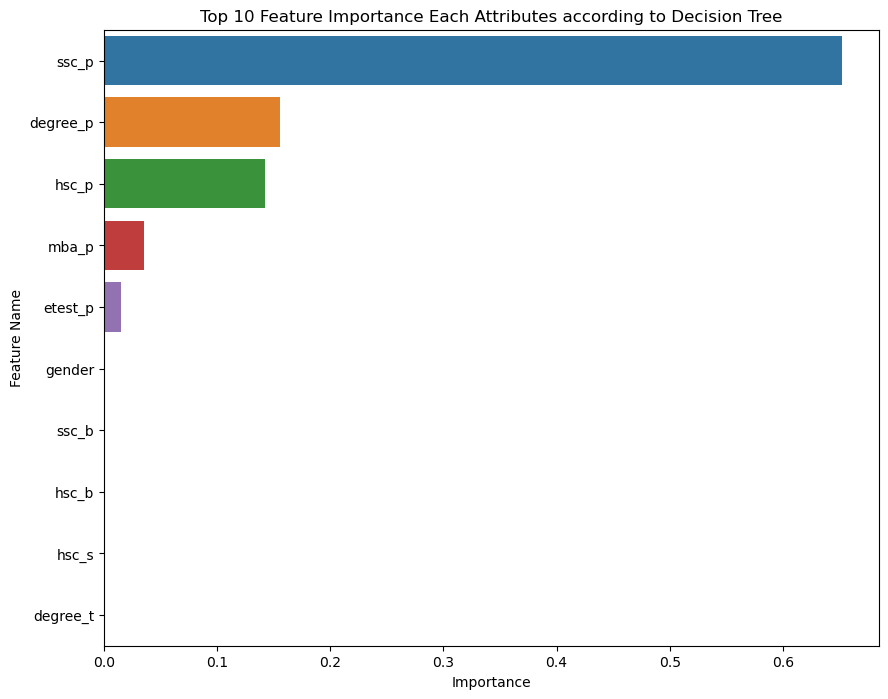

In [57]:
#Important Features according to Decision Tree Classifier
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dt.feature_importances_
})
fig = imp_df.sort_values(by="Importance", ascending=False)

fig2 = fig.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fig2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes according to Decision Tree')
plt.xlabel ('Importance')
plt.ylabel ('Feature Name')
plt.show()

*Random Forest Classifier*

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rftree = RandomForestClassifier(criterion="gini", min_samples_split=2)
rftree.fit(x_train,y_train)

/tmp/wsuser/ipykernel_166/2456601605.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rftree.fit(x_train,y_train)


RandomForestClassifier()

In [60]:
from sklearn.metrics import accuracy_score
y_pred1 = rftree.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred1)*100 ,2), "%")

Accuracy Score : 89.23 %


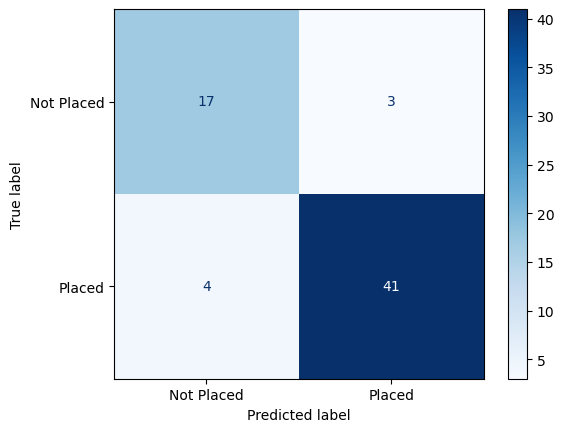

In [61]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred1, cmap = plt.cm.Blues, normalize = None, display_labels = ['Not Placed', 'Placed'])

In [62]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.93      0.91      0.92        45

    accuracy                           0.89        65
   macro avg       0.87      0.88      0.88        65
weighted avg       0.89      0.89      0.89        65



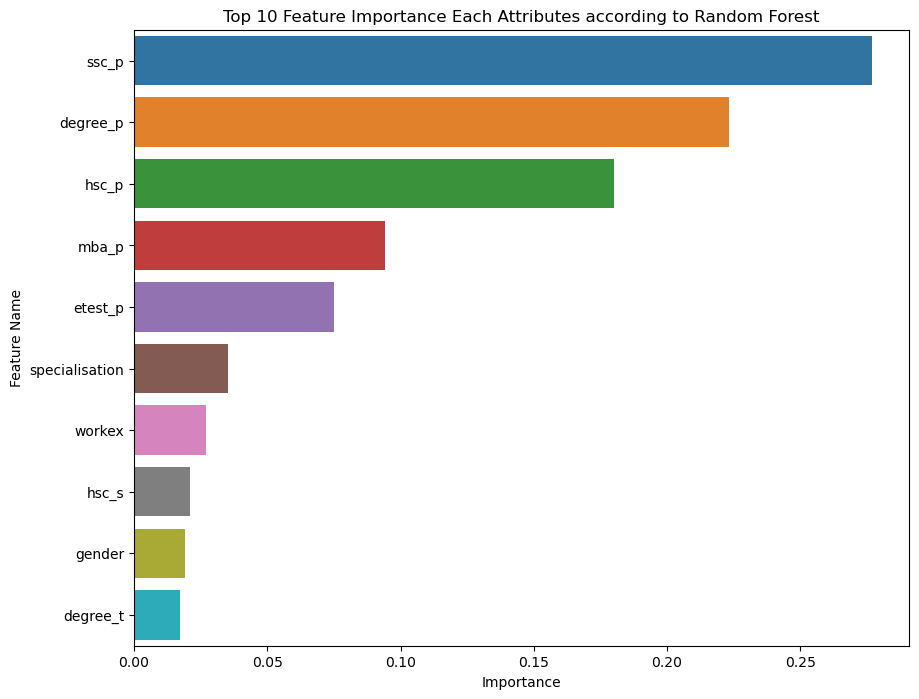

In [63]:
#Important Features according to Decision Tree Classifier
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": rftree.feature_importances_
})
fig = imp_df.sort_values(by="Importance", ascending=False)

fig2 = fig.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fig2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes according to Random Forest')
plt.xlabel ('Importance')
plt.ylabel ('Feature Name')
plt.show()

*SVM Classifier*

In [64]:
from sklearn.svm import SVC

In [65]:
sclf = SVC(kernel='linear')
sclf.fit(x_train, y_train)

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [66]:
from sklearn.metrics import accuracy_score
y_pred2 = sclf.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred2)*100 ,2), "%")

Accuracy Score : 89.23 %


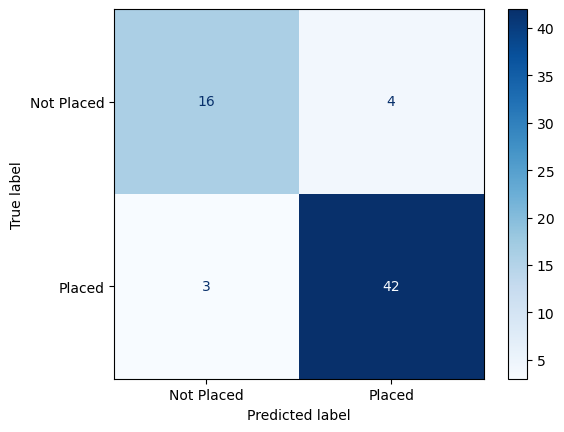

In [67]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred2, cmap = plt.cm.Blues, normalize = None, display_labels = ['Not Placed', 'Placed'])

In [68]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.91      0.93      0.92        45

    accuracy                           0.89        65
   macro avg       0.88      0.87      0.87        65
weighted avg       0.89      0.89      0.89        65



**Final Overview:**

From the above trained models, we observe that the Random Forest Classifier has predicted with good accuracy and according to it the important features are: *ssc_p, degree_p, hsc_p, mba_p, specialization*